In [1]:
import numpy as np
import pandas as pd


In [2]:
data =pd.read_csv("Churn_Modelling.csv")

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
data = pd.get_dummies(data, columns = ['Geography'])


In [6]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
data['Gender'] = l.fit_transform(data['Gender'])


In [7]:
X = data.iloc[:,:]

y = data.iloc[:,9]

In [8]:
X

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,1,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,9997,15569892,Johnstone,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,9998,15584532,Liu,709,0,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,9999,15682355,Sabbatini,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [9]:
X = X.drop(['RowNumber','CustomerId','Surname'], axis = 1)
X

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1,0


<AxesSubplot:>

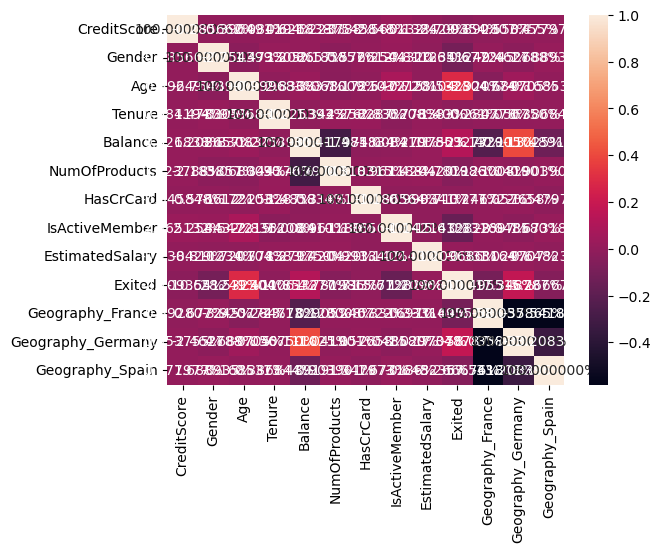

In [10]:
import seaborn as sns
sns.heatmap(X.corr() , annot = True, fmt = '%')


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test,  Y_train, Y_test = train_test_split(X,y, test_size = 0.20, random_state = 11 )

In [12]:
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
sc.fit_transform(X_train)
sc.fit_transform(X_test,Y_test)


array([[-1.31935936,  0.91647499, -0.76526426, ..., -0.99401789,
         1.71377008, -0.57581067],
       [-0.55323031,  0.91647499, -0.39029556, ...,  1.00601811,
        -0.58350885, -0.57581067],
       [-1.14910846,  0.91647499,  2.60945412, ...,  1.00601811,
        -0.58350885, -0.57581067],
       ...,
       [ 0.84069895,  0.91647499, -0.95274862, ..., -0.99401789,
         1.71377008, -0.57581067],
       [ 0.11713262, -1.09113725,  0.17215751, ..., -0.99401789,
        -0.58350885,  1.73668197],
       [ 2.1282214 ,  0.91647499, -0.95274862, ...,  1.00601811,
        -0.58350885, -0.57581067]])

In [13]:
Y_train

4199    1
757     1
4001    1
8163    1
4250    0
       ..
1293    0
4023    1
7259    1
5200    1
3775    0
Name: HasCrCard, Length: 8000, dtype: int64

In [14]:
from sklearn.linear_model import LogisticRegression
log =  LogisticRegression()
log.fit(X_train, Y_train)
log.predict(X_test)
log.score(X_test,Y_test)

0.7065

In [15]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 4)
forest.fit(X_train, Y_train)
forest.predict(X_test)
forest.score(X_test,Y_test)

1.0

In [16]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy')
tree.fit(X_train, Y_train)
tree.predict(X_test)
tree.score(X_test,Y_test)

1.0

In [17]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)
nb.predict(X_test)
nb.score(X_test,Y_test)

0.7065

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
knn.predict(X_test)
knn.score(X_test,Y_test)

C:\Users\CSLab\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\CSLab\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

0.6365

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(Y_test,knn.predict(X_test) ))
print(classification_report(Y_test,knn.predict(X_test)))

[[  88  499]
 [ 228 1185]]
              precision    recall  f1-score   support

           0       0.28      0.15      0.19       587
           1       0.70      0.84      0.77      1413

    accuracy                           0.64      2000
   macro avg       0.49      0.49      0.48      2000
weighted avg       0.58      0.64      0.60      2000



C:\Users\CSLab\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\CSLab\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [20]:
confusion_matrix(Y_test,log.predict(X_test) )
print(classification_report(Y_test,log.predict(X_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       587
           1       0.71      1.00      0.83      1413

    accuracy                           0.71      2000
   macro avg       0.35      0.50      0.41      2000
weighted avg       0.50      0.71      0.58      2000



C:\Users\CSLab\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CSLab\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CSLab\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
print(classification_report(Y_test,tree.predict(X_test)))
confusion_matrix(Y_test,tree.predict(X_test) )

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       587
           1       1.00      1.00      1.00      1413

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



array([[ 587,    0],
       [   0, 1413]], dtype=int64)

In [22]:
print(classification_report(Y_test,forest.predict(X_test)))
confusion_matrix(Y_test,forest.predict(X_test) )

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       587
           1       1.00      1.00      1.00      1413

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



array([[ 587,    0],
       [   0, 1413]], dtype=int64)

In [23]:
print(classification_report(Y_test,nb.predict(X_test)))
confusion_matrix(Y_test,nb.predict(X_test) )

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       587
           1       0.71      1.00      0.83      1413

    accuracy                           0.71      2000
   macro avg       0.35      0.50      0.41      2000
weighted avg       0.50      0.71      0.58      2000



C:\Users\CSLab\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CSLab\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CSLab\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[   0,  587],
       [   0, 1413]], dtype=int64)